In [1]:
# Importing the libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing Dataset

In [2]:
data = pd.read_csv('ObesitydataSet.csv')

## Preprocessing dataset features

In [3]:
data_1 = data[['Gender', 'Age', 'family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP','SMOKE', 'SCC']]
data['family_history_with_overweight'] = data_1['family_history_with_overweight'].map({'yes':1,'no':0})
data['Gender'] = data_1['Gender'].map({'Male':1,'Female':0})
data['FAVC'] = data_1['FAVC'].map({'yes':1,'no':0})
data['SMOKE'] = data_1['SMOKE'].map({'yes':1,'no':0})
data['SCC'] = data_1['SCC'].map({'yes':1,'no':0})

## Converting Categorical Features into Numerical

In [4]:
ord_encoders = {}
ord_vars = ('CAEC','CALC','NObeyesdad')
ord_vals = [(('no','Sometimes','Frequently','Always'),),
           (('no','Sometimes','Frequently','Always'),),
            (('Insufficient_Weight','Normal_Weight','Overweight_Level_I',
             'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'),)]
for i,key in enumerate(ord_vars):
    print(key,ord_vals[i])
    ord_encoders[key] = OrdinalEncoder(categories=ord_vals[i])
    ord_encoders[key].fit(np.asarray(data[key]).reshape(-1,1))
    col = 'ord_'+key
    data[col] = ord_encoders[key].transform(np.asarray(data[key]).reshape(-1,1))

CAEC (('no', 'Sometimes', 'Frequently', 'Always'),)
CALC (('no', 'Sometimes', 'Frequently', 'Always'),)
NObeyesdad (('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'),)


In [5]:
data = pd.concat([data,pd.get_dummies(data.MTRANS).add_prefix('MTRANS_')],axis=1)

In [6]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,ord_CAEC,ord_CALC,ord_NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,...,Public_Transportation,Normal_Weight,1.0,1.0,1.0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,Normal_Weight,1.0,2.0,1.0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,...,Walking,Overweight_Level_I,1.0,2.0,2.0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,...,Public_Transportation,Overweight_Level_II,1.0,1.0,3.0,0,0,0,1,0


In [7]:
X_columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP','SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'ord_CAEC',
          'ord_CALC','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
          'MTRANS_Public_Transportation', 'MTRANS_Walking']
X = data[X_columns]
y = data['ord_NObeyesdad']

## Multinomial Naive Bayes Implementation

In [8]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
 
# training a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
mnb_predictions = mnb.predict(X_test)

In [9]:
# accuracy on X_test
accuracy = accuracy_score(y_test, mnb_predictions)
print(f'Accuracy is : {accuracy*100:.2f}%')

Accuracy is : 59.47%


In [10]:
# creating a confusion matrix
cm = confusion_matrix(y_test, mnb_predictions)
cm

array([[64, 13,  1,  0,  0,  0,  0],
       [20, 27, 10, 10,  2,  0,  0],
       [ 1, 11, 30, 14, 11,  1,  0],
       [ 0,  3,  8, 28, 21,  5,  1],
       [ 0,  2,  0, 24, 32, 18, 10],
       [ 0,  0,  0,  3, 24, 46,  0],
       [ 0,  0,  0,  0,  0,  1, 87]])

In [11]:
cmp = ConfusionMatrixDisplay(cm, display_labels=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
             'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])

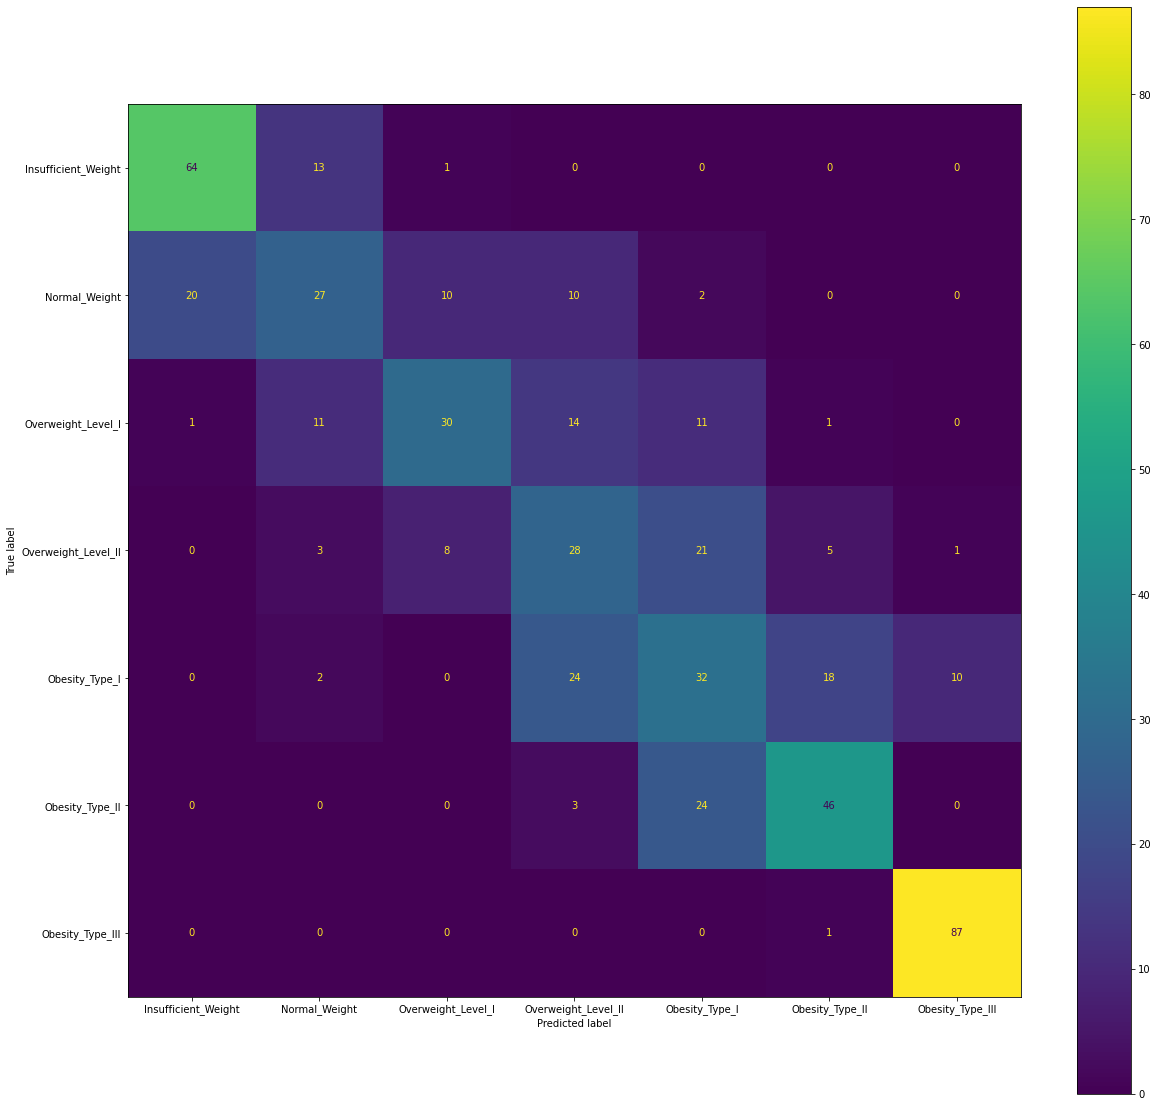

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

## Using Grid Search to find best parameters

In [16]:
param_grid_nb = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}
nbModel_grid = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid_nb)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
y_pred = nbModel_grid.predict(X_test)

MultinomialNB(alpha=0.01)


In [20]:
model = MultinomialNB(alpha=0)
model.fit(X_train, y_train)
new_pred = model.predict(X_test)
new_score = accuracy_score(y_test, y_pred)
print(f' Model Accuracy : {new_score*100:.2f}%')

 Model Accuracy : 59.47%


/opt/miniconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


## Improved Accuracy score in new NB model

In [17]:
score = accuracy_score(y_test, y_pred)
print(f' Simple NB Model Accuracy : {accuracy*100:.2f}%')
print(f'Optimal NB Model Accuracy : {score*100:.2f}%')
print("\nOptimal NB Model Classification Report : ")
print(classification_report(y_test, y_pred))

 Simple NB Model Accuracy : 59.47%
Optimal NB Model Accuracy : 59.47%

Optimal NB Model Classification Report : 
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.79        78
         1.0       0.49      0.41      0.44        69
         2.0       0.62      0.44      0.52        68
         3.0       0.35      0.44      0.39        66
         4.0       0.34      0.35      0.35        86
         5.0       0.65      0.63      0.64        73
         6.0       0.89      0.99      0.94        88

    accuracy                           0.59       528
   macro avg       0.59      0.58      0.58       528
weighted avg       0.59      0.59      0.59       528

